In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder 
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import artifact

In [22]:
df = pd.read_csv("clean_data.csv")

In [23]:
df

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min,Time_taken (min)
0,0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0,46
1,1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0,23
2,2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0,21
3,3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0,20
4,4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,11.0,35.0,11.0,45.0,32
45580,45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,19.0,55.0,20.0,10.0,36
45581,45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,23.0,50.0,24.0,5.0,16
45582,45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,13.0,35.0,13.0,40.0,26


In [24]:
x = df.drop(labels=["Time_taken (min)",'Unnamed: 0'],axis=1)
y = df[["Time_taken (min)"]]

In [25]:
y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [26]:
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0


In [27]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [28]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [46]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_order_hour', 'Time_order_min',
       'Time_order_picked_hour', 'Time_order_picked_min'],
      dtype='object')

In [47]:
categorical_cols 


Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [30]:
for i in categorical_cols:
    print(df[i].unique())

['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
['Jam' 'High' 'Medium' 'Low']
['motorcycle' 'scooter' 'electric_scooter' 'bicycle']
['No' 'Yes']
['Metropolitian' 'Urban' 'Semi-Urban']


In [32]:
numerical_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_order_hour', 'Time_order_min',
       'Time_order_picked_hour', 'Time_order_picked_min'],
      dtype='object')

In [49]:
'''
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


    
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('OneHotEncoder',OneHotEncoder(),categorical_cols)
])
'''

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Define the categorical and numerical columns
categorical_cols = ['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle', 'Festival', 'City']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude',
                  'Delivery_location_latitude', 'Delivery_location_longitude', 'Vehicle_condition',
                  'multiple_deliveries', 'Time_order_hour', 'Time_order_min', 'Time_order_picked_hour',
                  'Time_order_picked_min']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [53]:
categorical_cols

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_vehicle',
 'Festival',
 'City']

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [55]:
x_train

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
5755,36.0,4.1,22.310329,73.169083,22.380329,73.239083,Sandstorms,Jam,0,motorcycle,0.0,No,Metropolitian,21.0,40.0,21.000,50.0
9163,29.0,3.6,22.310526,73.170937,22.370526,73.230937,Sunny,Jam,0,motorcycle,3.0,Yes,Urban,21.0,10.0,21.000,15.0
16410,31.0,4.8,26.473698,80.352677,26.493698,80.372677,Windy,Low,2,scooter,1.0,No,Metropolitian,10.0,45.0,10.000,55.0
36945,33.0,4.2,15.157944,73.950889,15.287944,74.080889,Windy,Jam,2,scooter,1.0,No,Metropolitian,19.0,15.0,19.000,30.0
14679,34.0,4.1,19.126630,72.829976,19.146630,72.849976,Windy,Low,0,motorcycle,1.0,No,Urban,8.0,45.0,0.375,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,37.0,4.9,26.474986,80.342796,26.494986,80.362796,Sunny,Low,1,motorcycle,0.0,No,Urban,8.0,25.0,8.000,35.0
33268,28.0,4.9,17.431477,78.400350,17.481477,78.450350,Fog,Medium,2,motorcycle,0.0,No,Metropolitian,17.0,40.0,17.000,45.0
44845,20.0,4.7,22.514585,88.393310,22.594585,88.473310,Fog,Low,2,scooter,1.0,No,Metropolitian,22.0,20.0,22.000,25.0
4517,34.0,4.6,12.970324,77.645748,12.990324,77.665748,Cloudy,Low,1,motorcycle,1.0,No,Metropolitian,8.0,55.0,9.000,10.0


In [56]:
X_train=pd.DataFrame(pipeline.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(pipeline.transform(x_test),columns=preprocessor.get_feature_names_out())

In [57]:
X_train

,cat__Weather_conditions_Cloudy,cat__Weather_conditions_Fog,cat__Weather_conditions_Sandstorms,cat__Weather_conditions_Stormy,cat__Weather_conditions_Sunny,cat__Weather_conditions_Windy,cat__Road_traffic_density_High,cat__Road_traffic_density_Jam,cat__Road_traffic_density_Low,cat__Road_traffic_density_Medium,...,num__Restaurant_latitude,num__Restaurant_longitude,num__Delivery_location_latitude,num__Delivery_location_longitude,num__Vehicle_condition,num__multiple_deliveries,num__Time_order_hour,num__Time_order_min,num__Time_order_picked_hour,num__Time_order_picked_min
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.647373,0.131167,0.669961,0.116679,-1.223528,-1.318236,0.771107,0.527442,0.730584,1.238589
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.647397,0.131248,0.668629,0.116295,-1.223528,3.943714,0.771107,-1.710538,0.730584,-1.076966
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.156141,0.443938,1.228657,0.452410,1.160323,0.435747,-0.945003,0.900438,-0.959422,1.569382
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.226656,0.165206,-0.293358,0.156297,1.160323,0.435747,0.459087,-1.337541,0.423310,-0.084585
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.258322,0.116402,0.230746,0.098366,-1.223528,0.435747,-1.257023,0.900438,-2.438177,-0.084585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.156298,0.443508,1.228832,0.451945,-0.031602,-1.318236,-1.257023,-0.591548,-1.266696,0.246208
31904,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.051172,0.358934,0.004577,0.361939,1.160323,-1.318236,0.147067,0.527442,0.116036,0.907795
31905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.672333,0.794024,0.699062,0.833653,1.160323,0.435747,0.927117,-0.964545,0.884220,-0.415379
31906,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.493985,0.326079,-0.605431,0.325013,-0.031602,0.435747,-1.257023,1.646431,-1.113059,-1.407759


In [58]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,  rmse, r2_square

In [59]:
models = {
    "Linear_Regression":LinearRegression(),
    "Lasso":Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'svm':SVR(kernel = 'rbf')
    
}

trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train.values.ravel())

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


Linear_Regression
Model Training Performance
RMSE: 6.289758204399595
MAE: 4.967285870320269
R2 score 54.2619842619686


Lasso
Model Training Performance
RMSE: 7.47031398870327
MAE: 5.912177726734041
R2 score 35.481073682909184


Ridge
Model Training Performance
RMSE: 6.289211675064886
MAE: 4.965897454345539
R2 score 54.269932447089154


Elasticnet
Model Training Performance
RMSE: 7.571947107129513
MAE: 6.032055113220101
R2 score 33.71358031458818


svm
Model Training Performance
RMSE: 5.607115905584334
MAE: 4.358410271245422
R2 score 63.65133322191101




### Result

In [41]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
4,svm,0.636513
0,Linear_Regression,0.542702
2,Ridge,0.542699
1,Lasso,0.354811
3,Elasticnet,0.337136


### Linear Regression

In [42]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %2f"%score)

Accuracy of the model is 54.270249


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plot y_test and y_pred

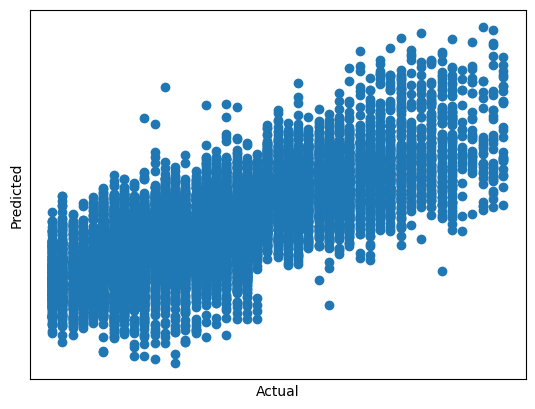

In [44]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()
